# Tema 5: Detección de líneas

En este cuaderno se desarrollan los ejemplos prácticos referentes al tema de expocisión, la intención es conocer algunas funcionalidades y herramientas que se utilizan con regularidad en procesos de visión computacional, específicamente para la detección de líneas.

**Objetivos**
* Implementar de manera práctica filtros en imágenes para la detección de líneas.
* Utilizar OpenCV como principal líbreria y conocer algunas de sus funciones.
* Analizar el proceso matemático que utilizan los filtros de detección de líneas.

In [28]:
import cv2
cv2.__version__

'4.8.0'

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
imagen_prueba = cv2.imread("edificio.jpg")
imagen_prueba.shape

(385, 528, 3)

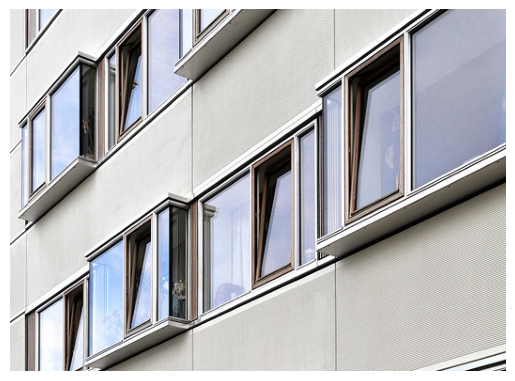

In [31]:
imagen_rgb = cv2.cvtColor(imagen_prueba, cv2.COLOR_BGR2RGB)

plt.imshow(imagen_rgb)
plt.axis("off");

Para esta práctica se trabajará con la imagen en escala de grises, por lo que realizamos la transformación de RGB.

In [32]:
imagen_gray = cv2.cvtColor(imagen_prueba, cv2.COLOR_BGR2GRAY)
imagen_gray.shape

(385, 528)

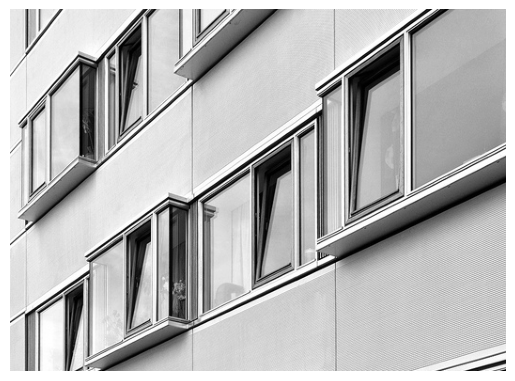

In [33]:
plt.imshow(imagen_gray, cmap="gray")
plt.axis("off");

## LSD: Line Segments Detector

Ahora que tenemos la imagen en escala de grises podemos utilizar la función integrada en OpenCV LineSegmentsDetector() para crear una función personalizada que nos permita detectar las líneas en la imagen.

Documentación OpenCV: https://docs.opencv.org/4.8.0/db/d73/classcv_1_1LineSegmentDetector.html

#### LSD método .detect()

**Parámetros**

**imagen:** Una imagen de entrada en escala de grises (CV_8UC1). Si solo se necesita seleccionar un roi, use: lsd_ptr-\>detect(image(roi), lines, ...); líneas += Escalar(roi.x, roi.y, roi.x, roi.y);

**líneas:** Un vector de elementos Vec4f que especifican el punto inicial y final de una línea. Donde Vec4f es (x1, y1, x2, y2), el punto 1 es el inicio, el punto 2 es el final. Las líneas devueltas están estrictamente orientadas según el gradiente.

**ancho:** Vector de anchos de las regiones, donde se encuentran las líneas. P.ej. Ancho de línea.

**prec:** Vector de precisiones con las que se encuentran las rectas.

**nfa:** Vector que contiene el número de falsas alarmas en la región de la línea, con una precisión del 10 %. Cuanto mayor sea el valor, logarítmicamente mejor será la detección.

In [74]:
def mostrar_imagenes(imagen_original, imagen_lineas):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
    ax1.imshow(imagen_original)
    ax2.imshow(imagen_lineas)
    ax1.set_title("Imagen original")
    ax2.set_title("Imagen con LSD aplicado")
    ax1.axis('off')
    ax2.axis('off');

def detectar_lineas(imagen_path):   
    imagen = cv2.imread(imagen_path)
    imagen_color = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # contructor de función LSD()
    lsd = cv2.createLineSegmentDetector()
    # Se utiliza el método detect() para detectar las líneas presentes en la imagen
    lineas, _, _, _ = lsd.detect(gray)
    
    line_image = np.copy(imagen_color)
    
    if lineas is not None:
        lineas = lineas.reshape((-1, 4))
        for x1, y1, x2, y2 in lineas:
                # imagen, coordenada inicio, coordenada final, color, grosor
                cv2.line(line_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                
    return line_image    

In [75]:
imagen_lineas = detectar_lineas("edificio.jpg")

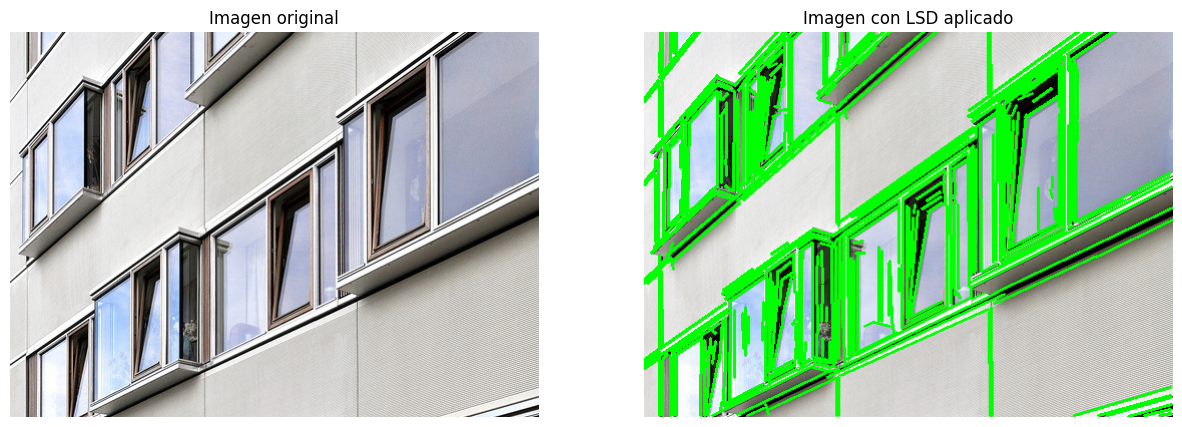

In [60]:
mostrar_imagenes(imagen_rgb, imagen_lineas)

Probando con más imágenes:

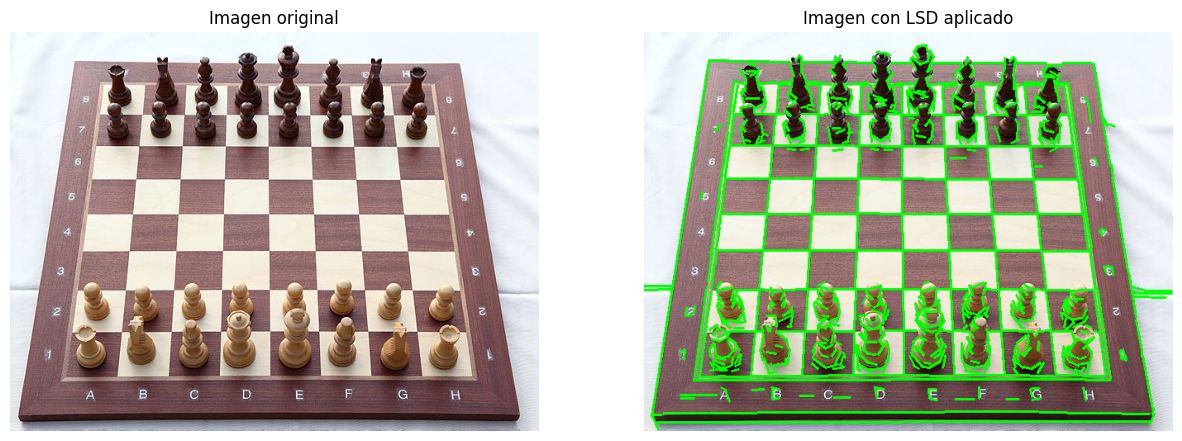

In [37]:
imagen_prueba_1 = cv2.imread("tablero.jpg", cv2.COLOR_BGR2RGB)
imagen_prueba_1 = cv2.cvtColor(imagen_prueba_1, cv2.COLOR_BGR2RGB)
imagen_tablero = detectar_lineas("tablero.jpg")

mostrar_imagenes(imagen_prueba_1, imagen_tablero)

## ¿Detección de bordes para detección de líneas?
### FILTRO SOBEL

El filtro sobel se define con dos diferentes kernels de 3x3, uno para detectar líneas horizontales y otro para detectar líneas verticales.

**Kernel para detección de líneas horizontales:**

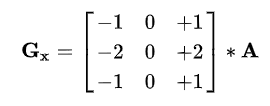

In [38]:
img = cv2.imread("tablero.jpg")
# verificar que la imagen pase a escala de grises en caso de que sea RGB/BGR
if img.shape[2] == 3:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img.shape

(483, 640)

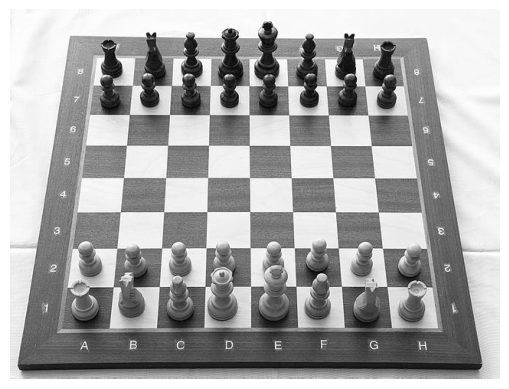

In [39]:
plt.imshow(img, cmap="gray")
plt.axis("off");

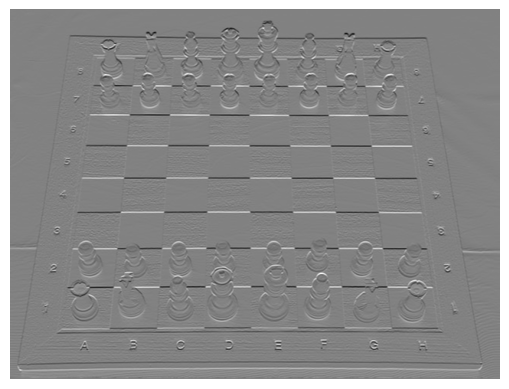

In [40]:
# definir filtro sobel horizontal

sobel_horizontal = np.array([[-1, -2, -1],
                            [ 0,  0,  0],
                            [ 1,  2,  1]])


gradiente_horizontal = cv2.filter2D(img.astype(np.float64), -1, sobel_horizontal)

plt.imshow(gradiente_horizontal, cmap="gray")
plt.axis("off");

**Kernel para de líneas verticales:**

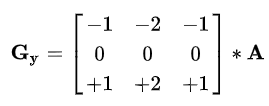

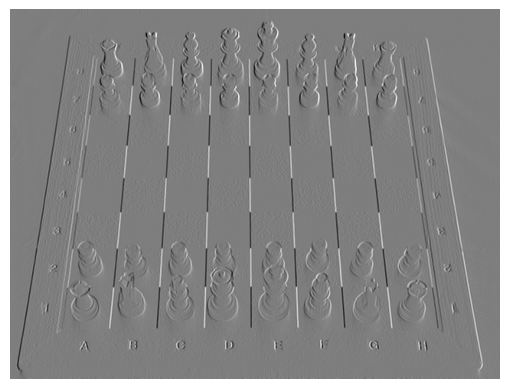

In [41]:
# definir filtro sobel vertical

sobel_vertical = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])


gradiente_vertical = cv2.filter2D(img.astype(np.float64), -1, sobel_vertical)

plt.imshow(gradiente_vertical, cmap="gray")
plt.axis("off");

**Kernel combinado:**

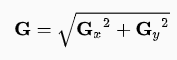

In [42]:
gradiente = np.sqrt(gradiente_horizontal**2 + gradiente_vertical**2)

In [43]:
gradiente

array([[ 0.        ,  8.        ,  4.        , ..., 12.        ,
         6.        ,  0.        ],
       [ 0.        ,  8.        ,  5.09901951, ..., 11.40175425,
         7.07106781,  6.        ],
       [ 4.        ,  8.94427191,  7.21110255, ...,  8.94427191,
         7.61577311,  8.        ],
       ...,
       [40.        , 38.20994635, 33.73425559, ..., 35.80502758,
        37.12142239, 42.        ],
       [66.        , 63.63961031, 58.46366393, ..., 41.88078318,
        33.73425559, 32.        ],
       [ 0.        , 12.        , 16.        , ..., 22.        ,
         6.        ,  0.        ]])

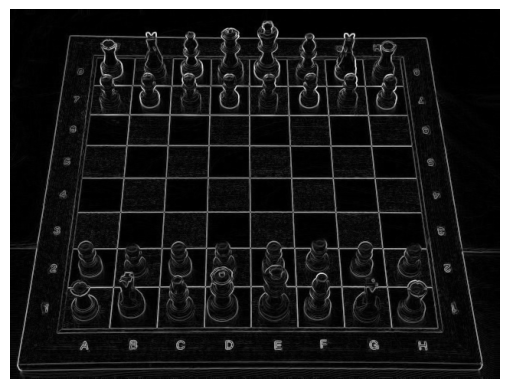

In [44]:
plt.imshow(gradiente, cmap="gray")
plt.axis("off");